# Multi-Disease Risk Modeling

## Objective

In this notebook, we build baseline machine learning models 
to predict multiple chronic diseases using engineered health risk features.

Target Diseases:
- Diabetes
- Heart Disease
- Stroke
- High Blood Pressure

This notebook focuses on:
1. Loading engineered data
2. Preparing modeling inputs
3. Training baseline models
4. Evaluating performance


## Why Baseline Models?

We start with Logistic Regression because:

- It is interpretable
- It works well for healthcare risk modeling
- It provides probability outputs
- It establishes a benchmark for comparison

More complex models (Random Forest, XGBoost) will only be used 
after evaluating baseline performance.


In [50]:
# Core ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report


In [51]:
import pandas as pd

# Load engineered dataset
df_model = pd.read_csv("../data/processed/health_risk_engineered.csv")

df_model.head()


,Diabetes_012,Age,BMI,HighBP,HighChol,PhysActivity,Smoker,PreventiveCareIndex,RiskScore,RiskLevel,HeartDiseaseorAttack,Stroke,RiskLevelEncoded,Diabetes_binary
0,0.0,9.0,40.0,1.0,1.0,0.0,1.0,2.0,4.0,High,0.0,0.0,2,0
1,0.0,7.0,25.0,0.0,0.0,1.0,1.0,2.0,0.0,Low,0.0,0.0,0,0
2,0.0,9.0,28.0,1.0,1.0,0.0,0.0,3.0,3.0,Medium,0.0,0.0,1,0
3,0.0,11.0,27.0,1.0,0.0,1.0,0.0,5.0,1.0,Low,0.0,0.0,0,0
4,0.0,11.0,24.0,1.0,1.0,1.0,0.0,5.0,2.0,Medium,0.0,0.0,1,0


## Feature and Target Selection

We define:

- X → Engineered health risk features
- Y → Multi-disease binary targets

Multi-output classification will allow simultaneous prediction
of multiple diseases.


In [52]:
df_model.columns


Index(['Diabetes_012', 'Age', 'BMI', 'HighBP', 'HighChol', 'PhysActivity',
       'Smoker', 'PreventiveCareIndex', 'RiskScore', 'RiskLevel',
       'HeartDiseaseorAttack', 'Stroke', 'RiskLevelEncoded',
       'Diabetes_binary'],
      dtype='object')

In [53]:
model_features = [
    'Age',
    'BMI',
    'HighChol',
    'PhysActivity',
    'Smoker',
    'PreventiveCareIndex',
    'RiskScore'
]

multi_targets = [
    'Diabetes_binary',
    'HeartDiseaseorAttack',
    'Stroke',
    'HighBP'
]

X = df_model[model_features]
Y = df_model[multi_targets]

print("Feature shape:", X.shape)
print("Target shape:", Y.shape)


Feature shape: (253680, 7)
Target shape: (253680, 4)


## Train-Test Split

We split the dataset into:

- 80% Training data
- 20% Testing data

This ensures the model is evaluated on unseen data 
to measure generalization performance.


In [54]:
# Define features (X) and multi-disease targets (Y)
X = df_model[model_features]
Y = df_model[multi_targets]

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (202944, 7)
Testing set shape: (50736, 7)


## Feature Scaling

StandardScaler is used to normalize feature distributions.

This improves model convergence and ensures 
features contribute proportionally during training.


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Baseline Model: Logistic Regression

Logistic Regression is used as a baseline because:

- It is interpretable
- It works well for healthcare prediction
- It provides probability outputs
- It establishes a performance benchmark


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

log_reg = LogisticRegression(max_iter=1000)

multi_model = MultiOutputClassifier(log_reg)

multi_model.fit(X_train_scaled, Y_train)

print("✅ Baseline model trained successfully")


✅ Baseline model trained successfully


## Model Evaluation

We evaluate each disease prediction separately using:

- Precision
- Recall
- F1-score

Accuracy alone is insufficient due to class imbalance 
in healthcare datasets.


In [57]:
from sklearn.metrics import classification_report

Y_pred = multi_model.predict(X_test_scaled)

for i, disease in enumerate(multi_targets):
    print(f"\n📊 Classification Report for {disease}")
    print(classification_report(Y_test[disease], Y_pred[:, i]))



📊 Classification Report for Diabetes_binary
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.57      0.17      0.26      7941

    accuracy                           0.85     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.82      0.85      0.81     50736


📊 Classification Report for HeartDiseaseorAttack
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.48      0.04      0.08      4768

    accuracy                           0.91     50736
   macro avg       0.70      0.52      0.52     50736
weighted avg       0.87      0.91      0.87     50736


📊 Classification Report for Stroke
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48679
         1.0       0.00      0.00      0.00      2057

    accuracy                           0.96     507

c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Handling Class Imbalance

Healthcare datasets are naturally imbalanced:

- Stroke cases are rare
- Heart disease cases are fewer than healthy cases
- Diabetes prevalence is moderate

If we do not handle imbalance:

- Model will predict mostly "No disease"
- Recall for minority class will be very low
- Healthcare predictions become unreliable

We will improve minority detection using:

1. Class weights (Logistic Regression)
2. SMOTE (Synthetic Minority Oversampling)


In [58]:
for col in multi_targets:
    print(f"\nClass distribution for {col}:")
    print(Y[col].value_counts(normalize=True))



Class distribution for Diabetes_binary:
0    0.842412
1    0.157588
Name: Diabetes_binary, dtype: float64

Class distribution for HeartDiseaseorAttack:
0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

Class distribution for Stroke:
0.0    0.959429
1.0    0.040571
Name: Stroke, dtype: float64

Class distribution for HighBP:
0.0    0.570999
1.0    0.429001
Name: HighBP, dtype: float64


## Method 1: Class Weights

Instead of oversampling, we tell the model to give more importance 
to minority class errors.

This is safer than SMOTE for healthcare datasets 
because it does not artificially generate synthetic patients.


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Add class_weight='balanced'
log_reg_weighted = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

multi_model_weighted = MultiOutputClassifier(log_reg_weighted)

multi_model_weighted.fit(X_train_scaled, Y_train)

print("✅ Weighted multi-disease model trained")


✅ Weighted multi-disease model trained


In [60]:
from sklearn.metrics import classification_report

Y_pred_weighted = multi_model_weighted.predict(X_test_scaled)

for i, disease in enumerate(multi_targets):
    print(f"\n📊 Weighted Model Report for {disease}")
    print(classification_report(Y_test[disease], Y_pred_weighted[:, i]))



📊 Weighted Model Report for Diabetes_binary
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     42795
           1       0.32      0.75      0.45      7941

    accuracy                           0.71     50736
   macro avg       0.63      0.73      0.63     50736
weighted avg       0.84      0.71      0.75     50736


📊 Weighted Model Report for HeartDiseaseorAttack
              precision    recall  f1-score   support

         0.0       0.97      0.70      0.81     45968
         1.0       0.21      0.79      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.74      0.58     50736
weighted avg       0.90      0.71      0.77     50736


📊 Weighted Model Report for Stroke
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80     48679
         1.0       0.09      0.74      0.16      2057

    accuracy                           0.68     507

## Random Forest Model

Logistic Regression assumes linear relationships.

However, healthcare risk factors often interact in complex ways:

- BMI + HighBP together increase risk more than individually
- Lifestyle factors interact with cholesterol
- Age modifies multiple risk pathways

Random Forest is used because:

- It captures non-linear relationships
- It handles feature interactions automatically
- It is robust to noise
- It performs well on tabular medical datasets


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier


In [62]:
    # Define Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Wrap for multi-disease prediction
multi_rf = MultiOutputClassifier(rf_model)

# Train
multi_rf.fit(X_train_scaled, Y_train)

print("✅ Random Forest multi-disease model trained")


✅ Random Forest multi-disease model trained


## Evaluating Random Forest Model

We compare Random Forest performance with:

- Baseline Logistic Regression
- Weighted Logistic Regression

Focus:
- Recall for minority diseases
- F1-score balance


In [63]:
from sklearn.metrics import classification_report

Y_pred_rf = multi_rf.predict(X_test_scaled)

for i, disease in enumerate(multi_targets):
    print(f"\n🌲 Random Forest Report for {disease}")
    print(classification_report(Y_test[disease], Y_pred_rf[:, i]))



🌲 Random Forest Report for Diabetes_binary
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     42795
           1       0.45      0.21      0.29      7941

    accuracy                           0.84     50736
   macro avg       0.66      0.58      0.60     50736
weighted avg       0.80      0.84      0.81     50736


🌲 Random Forest Report for HeartDiseaseorAttack
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45968
         1.0       0.33      0.10      0.15      4768

    accuracy                           0.90     50736
   macro avg       0.62      0.54      0.55     50736
weighted avg       0.86      0.90      0.87     50736


🌲 Random Forest Report for Stroke
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48679
         1.0       0.12      0.01      0.02      2057

    accuracy                           0.96     50736


## Model Explainability: Feature Importance

In healthcare applications, model interpretability is critical.

Feature importance helps us understand:

- Which health factors contribute most to disease risk
- Whether the model aligns with medical knowledge
- If risk scoring logic is clinically reasonable

Since we used MultiOutput Random Forest,
each disease has its own trained estimator.


In [64]:
import pandas as pd

# Extract importance per disease
for i, disease in enumerate(multi_targets):
    
    # Get trained estimator for this disease
    estimator = multi_rf.estimators_[i]
    
    # Get feature importances
    importance = estimator.feature_importances_
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': model_features,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\n🔥 Feature Importance for {disease}")
    print(importance_df)



🔥 Feature Importance for Diabetes_binary
               Feature  Importance
1                  BMI    0.373358
6            RiskScore    0.282730
0                  Age    0.186577
5  PreventiveCareIndex    0.070995
2             HighChol    0.051384
3         PhysActivity    0.019491
4               Smoker    0.015465

🔥 Feature Importance for HeartDiseaseorAttack
               Feature  Importance
1                  BMI    0.435862
0                  Age    0.213915
6            RiskScore    0.195241
5  PreventiveCareIndex    0.067849
2             HighChol    0.043938
4               Smoker    0.028604
3         PhysActivity    0.014591

🔥 Feature Importance for Stroke
               Feature  Importance
1                  BMI    0.553969
0                  Age    0.202144
6            RiskScore    0.105187
5  PreventiveCareIndex    0.081473
2             HighChol    0.020856
4               Smoker    0.018245
3         PhysActivity    0.018126

🔥 Feature Importance for HighBP
     

## Visualizing Feature Importance

Bar plots help visually compare contribution of features 
for each disease.


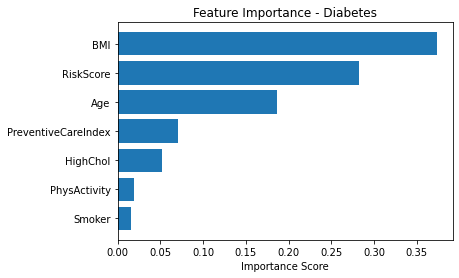

In [65]:
import matplotlib.pyplot as plt

# Example: Diabetes importance
estimator = multi_rf.estimators_[0]  # 0 = Diabetes_binary

importance = estimator.feature_importances_

importance_df = pd.DataFrame({
    'Feature': model_features,
    'Importance': importance
}).sort_values(by='Importance')

plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Diabetes")
plt.show()


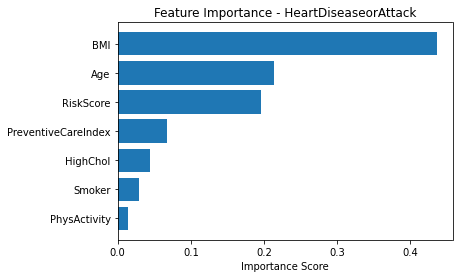

In [66]:
import matplotlib.pyplot as plt

estimator = multi_rf.estimators_[1]  # 1 = HeartDiseaseorAttack

importance = estimator.feature_importances_

importance_df = pd.DataFrame({
    'Feature': model_features,
    'Importance': importance
}).sort_values(by='Importance')

plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance - HeartDiseaseorAttack")
plt.show()


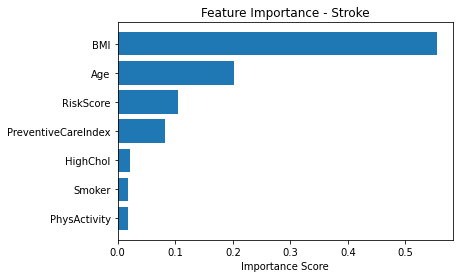

In [67]:
import matplotlib.pyplot as plt

# Example: Diabetes importance
estimator = multi_rf.estimators_[2]  # 2 = Stroke

importance = estimator.feature_importances_

importance_df = pd.DataFrame({
    'Feature': model_features,
    'Importance': importance
}).sort_values(by='Importance')

plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Stroke")
plt.show()


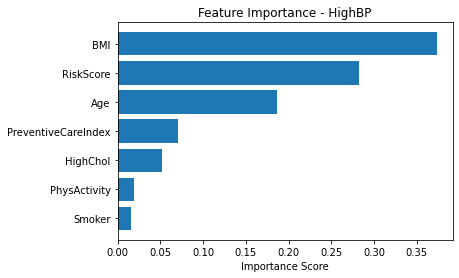

In [68]:
import matplotlib.pyplot as plt

estimator = multi_rf.estimators_[0]  # 3 = HighBP

importance = estimator.feature_importances_

importance_df = pd.DataFrame({
    'Feature': model_features,
    'Importance': importance
}).sort_values(by='Importance')

plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance - HighBP")
plt.show()


## Train Models and Generate Predictions

Here we train a separate model for each disease target 
and store predictions in a dictionary for evaluation.


In [69]:
from sklearn.linear_model import LogisticRegression

predictions = {}
models = {}

for target in multi_targets:
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, Y_train[target])
    
    y_pred = model.predict(X_test)
    
    models[target] = model
    predictions[target] = y_pred

print("✅ Models trained and predictions generated")


✅ Models trained and predictions generated


# 05 – Model Evaluation & Comparison

In this section, we:

• Evaluate model performance using accuracy, precision, recall, and F1-score  
• Compare different algorithms  
• Analyze performance for each disease  
• Identify the best performing model  

This step helps us understand which model works best for multi-disease prediction.


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

for target in multi_targets:
    print(f"\n🔹 Evaluation for {target}")
    
    y_true = Y_test[target]
    y_pred = predictions[target]
    
    print(classification_report(y_true, y_pred))



🔹 Evaluation for Diabetes_binary
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     42795
           1       0.57      0.17      0.26      7941

    accuracy                           0.85     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.82      0.85      0.81     50736


🔹 Evaluation for HeartDiseaseorAttack
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.48      0.04      0.08      4768

    accuracy                           0.91     50736
   macro avg       0.70      0.52      0.52     50736
weighted avg       0.87      0.91      0.87     50736


🔹 Evaluation for Stroke


c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     48679
         1.0       0.00      0.00      0.00      2057

    accuracy                           0.96     50736
   macro avg       0.48      0.50      0.49     50736
weighted avg       0.92      0.96      0.94     50736


🔹 Evaluation for HighBP
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     28810
         1.0       0.89      0.90      0.90     21926

    accuracy                           0.91     50736
   macro avg       0.91      0.91      0.91     50736
weighted avg       0.91      0.91      0.91     50736



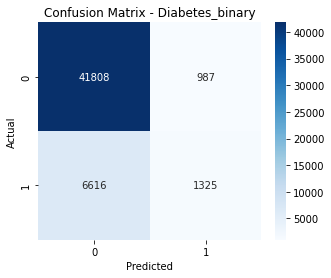

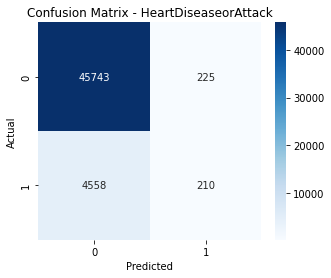

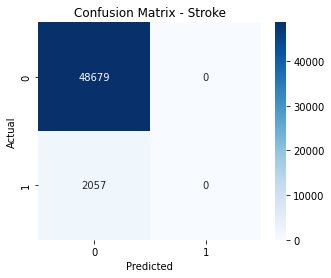

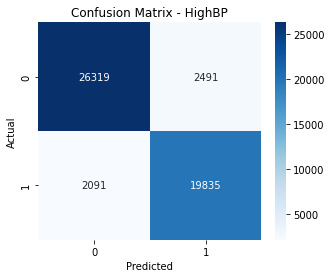

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

for target in multi_targets:
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(Y_test[target], predictions[target])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Probability-Based Risk Scoring

Instead of using only binary predictions (0/1), 
we use predicted probabilities from the model.

This allows us to:

• Calculate personalized disease risk
• Create risk categories (Low / Medium / High)
• Build a combined multi-disease risk score


In [72]:
risk_probabilities = {}

for target in multi_targets:
    model = models[target]
    probs = model.predict_proba(X_test)[:, 1]  # probability of class 1
    risk_probabilities[target] = probs

print("✅ Probability scores generated")


✅ Probability scores generated


### Convert to Risk Categories

In [73]:
def risk_category(prob):
    if prob < 0.3:
        return "Low"
    elif prob < 0.7:
        return "Medium"
    else:
        return "High"


In [74]:
risk_levels = {}

for target in multi_targets:
    risk_levels[target] = [risk_category(p) for p in risk_probabilities[target]]


### Create Combined Multi-Disease Risk Score

In [75]:
import numpy as np

combined_risk_score = np.mean(
    np.column_stack(list(risk_probabilities.values())),
    axis=1
)


In [76]:
combined_risk_level = [risk_category(p) for p in combined_risk_score]


### Create Final Risk DataFrame


In [77]:
risk_df = pd.DataFrame({
    'CombinedRiskScore': combined_risk_score,
    'CombinedRiskLevel': combined_risk_level
})

risk_df.head()


,CombinedRiskScore,CombinedRiskLevel
0,0.017397,Low
1,0.329065,Medium
2,0.004998,Low
3,0.007246,Low
4,0.396737,Medium


In [80]:
# Example: Assuming you trained these models

models = {
    "Logistic Regression": multi_model,
    "Weighted Logistic Regression": multi_model_weighted,
    "Random Forest": multi_rf,
}

from sklearn.metrics import roc_auc_score

model_scores = {}

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    model_scores[name] = auc

model_scores


c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\0701c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


TypeError: list indices must be integers or slices, not tuple